<a href="https://colab.research.google.com/github/subhadhana99/Regression/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [56]:
df = pd.read_csv("https://raw.githubusercontent.com/subhadhana99/Regression/main/car_data.csv")

In [57]:
df.head(5)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [58]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [59]:
df.dtypes


Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [60]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

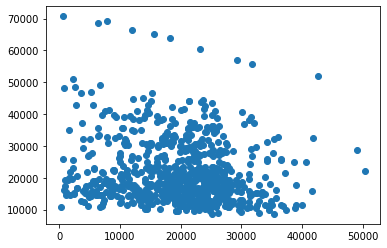

In [61]:
plt.scatter(df.Mileage,df.Price,)

In [62]:
df[['Price','Mileage']].corr()

,Price,Mileage
Price,1.000000,-0.143051
Mileage,-0.143051,1.000000


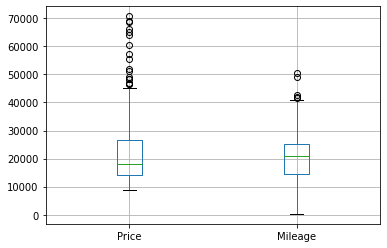

In [63]:
df.boxplot(['Price','Mileage'] 	)

In [64]:
iqr=df.Price.quantile(0.75)-df.Price.quantile(0.25)
upt=df.Price.quantile(0.75)+(1.5*iqr)
lwt=df.Price.quantile(0.25)-(1.5*iqr)
lwt,upt

(-4393.290277667038, 45383.68078365926)

In [65]:
iqr=df.Mileage.quantile(0.75)-df.Mileage.quantile(0.25)
upt=df.Mileage.quantile(0.75)+(1.5*iqr)
lwt=df.Mileage.quantile(0.25)-(1.5*iqr)
lwt,upt

(-1260.75, 41097.25)

In [66]:
#treating the outliers
df.Price= df.Price.clip(-4393.290277667038, 45383.68078365926)

In [67]:
df.Mileage=df.Mileage.clip(-1260.75, 41097.25)

In [68]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21099.998496,19807.086132,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9031.505318,8119.836852,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,45383.680784,41097.250000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [69]:
df[['Price','Mileage']].corr()

,Price,Mileage
Price,1.000000,-0.138997
Mileage,-0.138997,1.000000


In [70]:
from sklearn.model_selection import train_test_split 
x = df.loc[:,['Mileage']].values
y = df.loc[:,'Price'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=856)

In [71]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.intercept_)


24003.525841886025


In [72]:
print(reg.coef_)

[-0.14737122]


In [73]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(reg.coef_[0], reg.intercept_))

Linear Regression Equation: y = -0.1474 * x + 24003.5258


In [74]:
reg.score(x_test,y_test)

0.023681251220257105

In [75]:
y_pred = reg.predict(x_test)

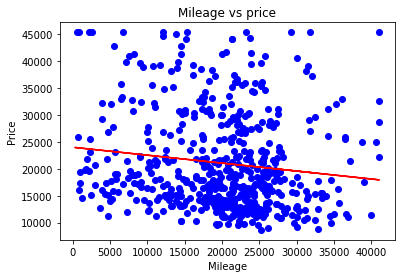

In [76]:
plt.scatter(x_train, y_train,color='b') 
plt.plot(x_test, y_pred,color='r') 
plt.title('Mileage vs price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [77]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.138997,0.569795,0.570744,-0.108917,0.456111,-0.149583,0.155412
Mileage,-0.138997,1.000000,-0.028069,-0.016878,-0.015384,0.023516,-0.025447,-0.000876
Cylinder,0.569795,-0.028069,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.570744,-0.016878,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.108917,-0.015384,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.456111,0.023516,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.149583,-0.025447,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.155412,-0.000876,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


Splitting of data


In [78]:
x = df.loc[:,['Mileage','Cylinder','Liter',	'Doors','Cruise','Sound', 'Leather']].values
y = df.loc[:,'Price'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=856)

Deploying linear Regression Model between Price and the factors (mileage, cylinders, liters, doors, cruise, sound, and leather )

In [79]:
reg=LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [80]:
coefs= pd.DataFrame(reg.coef_,['Mileage','Cylinder','Liter',	'Doors','Cruise','Sound', 'Leather'],columns=['Coefficient'])
coefs

,Coefficient
Mileage,-0.144551
Cylinder,2210.290375
Liter,1104.064312
Doors,-314.977146
Cruise,5906.453176
Sound,-2554.256276
Leather,3721.067560


In [81]:
reg.score(x_test,y_test)

0.3696918284335856

Since we have very low R-squared value this is not a best fit model

# To Find the combination of the factors that is the best predictor for price.

In [82]:
import itertools
from itertools import combinations
feature=['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
price=['Price']
X=df[feature]
Y=df[price]

In [83]:
combinations = []
for i in range(1,7):
    combinations.append(itertools.combinations(feature, i))
#[list(x) for x in combinations]

In [84]:
best_score = 0
for item in combinations:
    for group in item:
        group = list(group)
        x = df[group]
        linreg=linear_model.LinearRegression()
        model=linreg.fit(x,Y)
        modelscore = model.score(x,Y)
        
        if best_score < model.score(x,Y):
          best_score = model.score(x,Y)
          maxgr=group
        

print(maxgr,best_score)   

['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather'] 0.4577661551946085


# asigning Dummy variable to make, model, and body type.




In [85]:
from sklearn.preprocessing import LabelEncoder

In [86]:
df['Make'].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [87]:
df['Model'].unique()

array(['Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
       'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
       'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
       'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
       'L Series'], dtype=object)

In [88]:
df['Trim'].unique()

array(['Sedan 4D', 'CX Sedan 4D', 'CXL Sedan 4D', 'CXS Sedan 4D',
       'Custom Sedan 4D', 'Limited Sedan 4D', 'Special Ed Ultra 4D',
       'DHS Sedan 4D', 'DTS Sedan 4D', 'Hardtop Conv 2D',
       'LS Hatchback 4D', 'LS Sedan 4D', 'LT Hatchback 4D', 'LT Sedan 4D',
       'SVM Hatchback 4D', 'SVM Sedan 4D', 'Coupe 2D', 'LS Coupe 2D',
       'LS Sport Coupe 2D', 'LS Sport Sedan 4D', 'Conv 2D', 'SS Sedan 4D',
       'LS MAXX Hback 4D', 'LT MAXX Hback 4D', 'MAXX Hback 4D',
       'LT Coupe 2D', 'SS Coupe 2D', 'GXP Sedan 4D', 'SE Sedan 4D',
       'SLE Sedan 4D', 'GT Sedan 4D', 'GT Coupe 2D', 'GTP Sedan 4D',
       'AWD Sportwagon 4D', 'GT Sportwagon', 'Sportwagon 4D',
       'Linear Conv 2D', 'Linear Sedan 4D', 'Aero Conv 2D',
       'Aero Sedan 4D', 'Arc Conv 2D', 'Arc Sedan 4D', 'Arc Wagon 4D',
       'Linear Wagon 4D', 'Aero Wagon 4D', 'Quad Coupe 2D',
       'L300 Sedan 4D'], dtype=object)

In [89]:
df['Type'].unique()

array(['Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
      dtype=object)

In [90]:
Lbe=LabelEncoder()
Lbe

LabelEncoder()

In [91]:
for i in ['Make','Model','Trim','Type']:
  df[i]=Lbe.fit_transform(df[i])
df.head(5)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221.0,0,10,44,3,6,3.1,4,1,1,1
1,17542.036083,9135.0,0,10,44,3,6,3.1,4,1,1,0
2,16218.847862,13196.0,0,10,44,3,6,3.1,4,1,1,0
3,16336.913140,16342.0,0,10,44,3,6,3.1,4,1,0,0
4,16339.170324,19832.0,0,10,44,3,6,3.1,4,1,0,1


In [92]:
features=list(df.columns)[1:]
x=df.iloc[:,1:]
y=df.Price

To find the best Combinations of factors to predict price.

In [93]:
combinations = []
for i in range(1,11):
    combinations.append(itertools.combinations(features, i))

In [94]:
best_score = 0
for item in combinations:
    for group in item:
        group = list(group)
        x = df[group]
        linreg=linear_model.LinearRegression()
        model=linreg.fit(x,y)
        modelscore = model.score(x,y)
        
        if best_score < model.score(x,y):
          best_score = model.score(x,y)
          maxgr=group
        

print(maxgr,best_score)   

['Mileage', 'Make', 'Model', 'Trim', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'] 0.5336108650820464
